### Unicode

In [32]:
# 한글이 가지는 유니코드 값은 AC00부터 D7A3
'''
호환용 한글 자모 닿소리와 홀소리 같은 한글 자모를 표현하기 위한 영역이다. 
이 영역은 현대 한글에서 사용하는 자음(U+3130 ~ U+314E), 모음(U+314F ~ U+3163), 채움 코드(U+3164), 
옛한글 자모(U+3165 ~ U+318E)로 구성되어 있다.
'''
def get_hanguls() :
    jaum_start = int("3130", 16)
    jaum_end = int("314E", 16)

    moum_start = int("314F", 16)
    moum_end = int("3163", 16)

    yethangul_start = int("3165", 16)
    yethangul_end = int("316E", 16)

    hangul_start = int("AC00", 16)
    hangul_end = int("D7A3", 16)
    chars = []
    for idx in range(hangul_start, hangul_end + 1) :
        character = chr(idx)
        chars.append(character)

In [26]:
chr(int("DC00", 16))

'\udc00'

In [3]:
chr(4352) == 'ㄱ'

False

In [5]:
hex(ord('ㄱ'))

'0x3131'

In [37]:
chars[0]

'가'

In [21]:
hex(432)

'0x1b0'

'\uabfe'

In [26]:
print(int("AC00", 16))
print(int("D7A3", 16))

44032
55203


In [30]:
chr(int("AC00", 16))

'가'

### Text to Image

In [12]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [15]:
!pip install ascii

  Preparing metadata (setup.py) ... done
  Created wheel for ascii: filename=ascii-3.6-py3-none-any.whl size=3465 sha256=80ce2720c99ca75fab29c004f950ecbcabc58b6ccad977aa0c19000482383b0f
  Stored in directory: /home/nykim/.cache/pip/wheels/9f/c8/cf/b5fdb731291089a3c97d4424cc9fe6b0e7b75a06121b2f3ce9
Successfully built ascii


In [16]:
import ascii

print(ascii.charlist())

AttributeError: module 'ascii' has no attribute 'charlist'

In [20]:
print("\uAC00")

가


In [18]:
import string
string.printable


'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
# SAMPLE USAGE:
# python3 mydraw_individual.py < add_chars.dat

from PIL import Image, ImageDraw, ImageFont, ImageFilter
import sys

width,height = 24,24
font_size=22
font_color=(0,0,0)

for line in sys.stdin:
 
    #print(i) 
    unicode_text = line.strip()
    i = ord(unicode_text)
    print(i)
    if i%500==0: 
        sys.stderr.write("%d\n"%i)
        sys.stderr.flush()

    im  =  Image.new ( "RGB", (width,height) )
    draw  =  ImageDraw.Draw ( im )
    unicode_font = ImageFont.truetype("DejaVuSans.ttf", font_size)
    try:
        draw.text ( (2,0), unicode_text, font=unicode_font) #, fill=font_color )
    except SystemError:
        continue 

#     im.save("images/text-other_%d.ppm"%i)
    im.save("/home/nykim/HateSpeech/02_images/text-other_%d.ppm"%i)

In [82]:
ord('i')

105

In [4]:
%matplotlib inline
from io import BytesIO

import matplotlib.pyplot as plt

from matplotlib.figure import Figure
from matplotlib.transforms import IdentityTransform

# %matplotlib

# %pylab inline

In [11]:
def text_to_rgba(s, *, dpi, **kwargs):
    # To convert a text string to an image, we can:
    # - draw it on an empty and transparent figure;
    # - save the figure to a temporary buffer using ``bbox_inches="tight",
    #   pad_inches=0`` which will pick the correct area to save;
    # - load the buffer using ``plt.imread``.
    #
    # (If desired, one can also directly save the image to the filesystem.)
    fig = Figure(facecolor="none")
    fig.text(0, 0, s, **kwargs)
    with BytesIO() as buf:
        fig.savefig(buf, dpi=dpi, format="png", bbox_inches="tight",
                    pad_inches=0)
        buf.seek(0)
        rgba = plt.imread(buf)
    return rgba


fig = plt.figure()
rgba1 = text_to_rgba(r"IQ: $\sigma_i=15$", color="blue", fontsize=20, dpi=200)
# rgba2 = text_to_rgba(r"some other string", color="red", fontsize=20, dpi=200)
# # One can then draw such text images to a Figure using `.Figure.figimage`.
fig.figimage(rgba1, 100, 50)
# fig.figimage(rgba2, 100, 150)

# One can also directly draw texts to a figure with positioning
# in pixel coordinates by using `.Figure.text` together with
# `.transforms.IdentityTransform`.
# fig.text(100, 250, r"IQ: $\sigma_i=15$", color="blue", fontsize=20,
#          transform=IdentityTransform())
# fig.text(100, 350, r"some other string", color="red", fontsize=20,
#          transform=IdentityTransform())
# plt.savefig('test.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [13]:
fig

<Figure size 640x480 with 0 Axes>

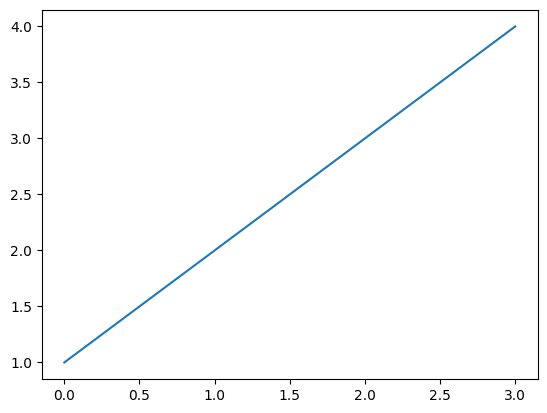

In [6]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.show()

In [1]:
from PIL import Image,ImageDraw,ImageFont

# draw_text = '㈉'
# draw_text = '⾘'
# draw_text = '¬'
# draw_text = chr(int("0090", 16))
draw_text= 'ㅇ'
# font = ImageFont.load_default()

text_width = 24
text_height = 24

canvas = Image.new('RGB', (text_width, text_height))
draw = ImageDraw.Draw(canvas)
# w, h = font.getsize(draw_text)
# draw.text(((text_width-w)/2.0,(text_height-h)/2.0), draw_text, 'black', font)
# font = ImageFont.truetype("/usr/share/fonts/nanum/NanumGothic.ttf", 20)
# font = ImageFont.truetype("DejaVuSans.ttf", 20)
font = ImageFont.truetype("/usr/share/fonts/truetype/MS/Arial-Unicode-MS.ttf", 20)
# font = ImageFont.truetype("/usr/share/fonts/truetype/MS/arialuni.ttf", 20)
# font = ImageFont.truetype("/usr/share/fonts/truetype/AppleSDGothicNeo/AppleSDGothicNeoR.ttf", 20)
# font = ImageFont.truetype("/usr/share/fonts/truetype/MS/PingFang-SC-Regular.ttf", 20)
draw.text ( (0,-2), draw_text, font=font)
canvas.show()
canvas.save(draw_text+'.png', "PNG")


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [7]:
draw_text = chr(int("0090", 16))
draw_text

'\x90'

In [16]:
from unidecode import unidecode
unidecode(chr(int("0090", 16))) == unidecode(chr(int("0091", 16)))

True

In [14]:
print(draw_text)
print('\x' in draw_text)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \xXX escape (891240997.py, line 2)

In [6]:
print('⾘')

⾘


In [2]:
!pip install Pillow==9.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.6 MB/s eta 0:00:00m eta 0:00:010:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 10.1.0
    Uninstalling Pillow-10.1.0:
      Successfully uninstalled Pillow-10.1.0


In [104]:
from pilmoji import Pilmoji
from PIL import Image, ImageFont


my_string = '''
Hello, world! 👋 Here are some emojis: 🎨 🌊 😎
I also support Discord emoji: <:rooThink:596576798351949847>
'''
draw_text = 'ᆄ'

text_width = 24
text_height = 24

canvas = Image.new('RGB', (text_width, text_height))
draw = ImageDraw.Draw(canvas)
# font = ImageFont.truetype("DejaVuSans.ttf", 20)
font = ImageFont.truetype("/usr/share/fonts/nanum/NanumGothic.ttf", 20)
with Pilmoji(canvas) as pilmoji:
    pilmoji.text((-2, -2), draw_text.strip(), (255, 255, 255), font)
canvas.save(draw_text+'.png', "PNG")
    
# with Image.new('RGB', (550, 80), (255, 255, 255)) as image:
#     font = ImageFont.truetype('arial.ttf', 24)

#     with Pilmoji(image) as pilmoji:
#         pilmoji.text((10, 10), my_string.strip(), (0, 0, 0), font)

#     image.show()

In [83]:
from PIL import Image
img = Image.open("/home/nykim/HateSpeech/02_images/PingFang-SC-Regular/12292.ppm")

In [84]:
img.show()

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [85]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 15.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 3.1 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 2.7 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.6 MB/s eta 0:00:00m eta 0:00:010:00:01


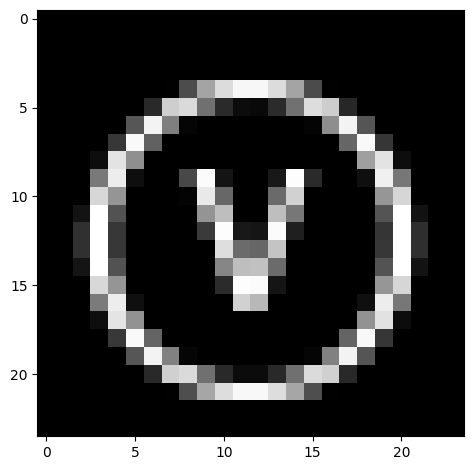

In [124]:
import skimage.io
from skimage import data, io, filters

# image = io.imread("/home/nykim/HateSpeech/02_images/Arial-Unicode-MS/51675.ppm")
image = io.imread("/home/nykim/HateSpeech/02_images/Arial-Unicode-MS/9445.ppm")
# image = io.imread("/home/nykim/HateSpeech/01_ipynb/짛.png")
io.imshow(image)

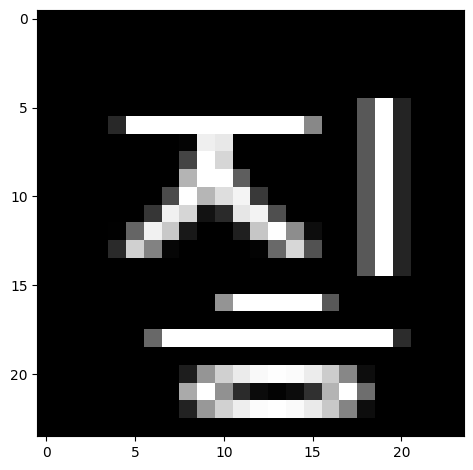

In [103]:
# image = io.imread("/home/nykim/HateSpeech/02_images/Arial-Unicode-MS/51675.ppm")
image = io.imread("/home/nykim/HateSpeech/01_ipynb/짛.png")
io.imshow(image)

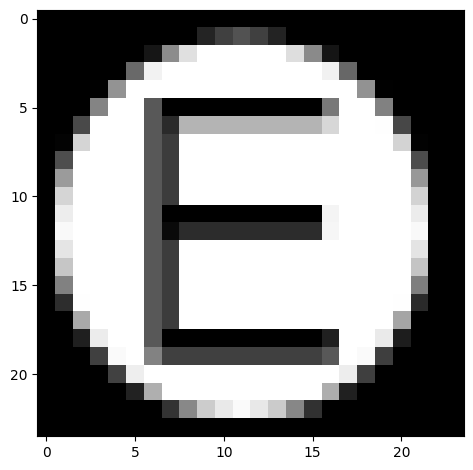

In [128]:
image = io.imread("/home/nykim/HateSpeech/02_images/PingFang-SC-Regular/127316.ppm")
io.imshow(image)